In [ ]:
from aeon.classification.interval_based import QUANTClassifier
from aeon.regression.interval_based import QUANTRegressor
from aeon.datasets import load_gunpoint
from aeon.datasets import load_from_ts_file
from aeon.datasets import load_basic_motions
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import qgap

In [2]:
'''modelC = QUANTClassifier(estimator=RandomForestClassifier)
modelR = QUANTRegressor(estimator=RandomForestRegressor)
modelMC = QUANTClassifier(estimator=RandomForestClassifier)'''

'modelC = QUANTClassifier(estimator=RandomForestClassifier)\nmodelR = QUANTRegressor(estimator=RandomForestRegressor)\nmodelMC = QUANTClassifier(estimator=RandomForestClassifier)'

In [3]:
XtrainC, ytrainC = load_gunpoint(split="TRAIN")
#Xtest1, ytest1 = load_gunpoint(split="TEST")

XtrainMC, ytrainMC = load_basic_motions(split="TRAIN")

In [4]:
qfgapC = qgap.QGAP(matrix_type="dense")
qfgapR = qgap.QGAP(prediction_type="regression", matrix_type="dense")
qfgapMC = qgap.QGAP(matrix_type="dense")



In [5]:
qfgapC.fit(XtrainC,ytrainC)
Pc = qfgapC.get_proximities()
print(Pc.shape)

(50, 50)


In [6]:
qfgapMC.fit(XtrainMC,ytrainMC)
Pmc = qfgapMC.get_proximities()
print(Pmc.shape)

(40, 40)


# Using Transformer to Add Static Labels

In [7]:
from aeon.transformations.collection.interval_based import QUANTTransformer as QT
import matplotlib.pyplot as plt
import numpy as np
from helpers import *
import pandas as pd

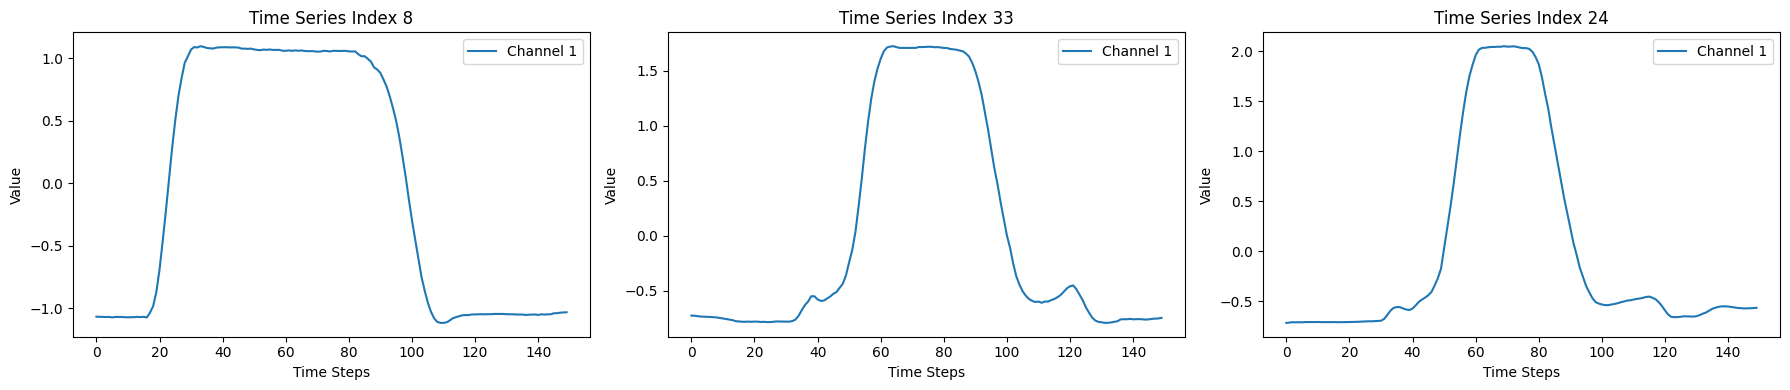

In [8]:
plot_random_time_series(XtrainC, None, 3)

In [9]:
# Fit and transform the time series
qt = QT()
qt.fit(XtrainC)
Xt = qt.transform(XtrainC)
print(Xt.shape), print(XtrainC.shape) # So we expanded our fifty time series into 1556 different features

(50, 1556)
(50, 1, 150)


(None, None)

In [10]:
pd.DataFrame(Xt).sample(3)

,0,1,2,3,4,5,6,7,8,9,...,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555
0,-0.782461,-0.740241,-0.673450,-0.664063,-0.662250,-0.661691,-0.661366,-0.660977,-0.659295,-0.658342,...,0.145551,0.261299,0.180227,0.186709,0.249155,0.276379,0.227995,0.294497,0.337118,0.221664
12,-1.406174,-1.339689,-1.325791,-1.306689,-1.291735,-1.178128,-1.028818,-1.007084,-1.001682,-0.996308,...,0.088243,0.030637,0.034552,0.045938,0.023497,0.029261,0.012441,0.042188,0.031015,0.029057
31,-1.488779,-1.485147,-1.483047,-1.482232,-1.481144,-1.480412,-1.389634,-1.374034,-1.370516,-1.364345,...,0.076204,0.068430,0.084444,0.041949,0.063174,0.064199,0.077563,0.027384,0.071422,0.083397


In [11]:
# Create random static variables to append to the dataframe
Xstatic = np.random.rand(Xt.shape[0], 45)
X = np.hstack([Xt, Xstatic])
X.shape

(50, 1601)

In [12]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights for classification based on ytrainC
sample_weights = compute_sample_weight(class_weight='balanced', y=ytrainC)

# Create and train the Random Forest using the sample weights
rf_model = RandomForestClassifier()
rf_model.fit(X, ytrainC, sample_weight=sample_weights)

RandomForestClassifier()

In [13]:
rf_model.feature_importances_.max()

np.float64(0.030350552921227705)

In [14]:
rf_model.predict(X)

array(['2', '2', '1', '1', '2', '2', '2', '2', '2', '1', '1', '1', '1',
       '1', '2', '1', '2', '2', '1', '2', '1', '1', '1', '2', '1', '2',
       '1', '1', '2', '1', '1', '2', '2', '1', '2', '1', '2', '2', '2',
       '2', '2', '1', '1', '1', '2', '2', '1', '2', '1', '2'], dtype='<U1')

## Qgap tests with static variables

In [15]:
qfgapC = qgap.QGAP(matrix_type="dense")

qfgapC.fit(XtrainC,ytrainC, static = Xstatic)
Pc = qfgapC.get_proximities()
print(Pc.shape)

(50, 50)
